In [2]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [4]:
def osc(y_v, t, omega2=1):
    dy = y_v[1]
    dv = -omega2*y_v[0]
    return array([dy, dv])

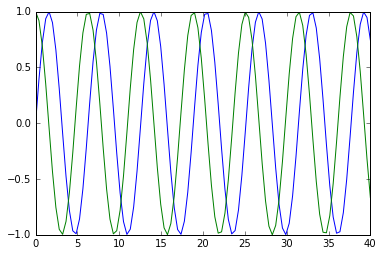

In [29]:
t = linspace(0,40, 100)
ini = array([0,1])

sol = odeint(osc, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

In [17]:
def root_trayect(func, pto_i, ti, error=1e-5):
    while abs(pto_i[0])>error:
        ti1 = ti - pto_i[0]/pto_i[1]
        sol = odeint(func, pto_i, [ti,ti1])
        ti = ti1
        pto_i = sol[-1]
    return ti, pto_i

In [24]:
ind = 10

ti = t[ind]
pto_i = sol[ind]
root_trayect(osc, pto_i, ti, error=1e-5)

(3.1415923416061156, array([  3.78723424e-07,  -9.99999825e-01]))

In [39]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

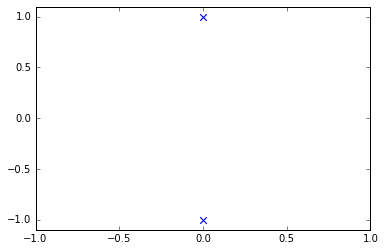

In [44]:
xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')

In [54]:
def osc_fric(y_v, t, omega2=1, gamma=0.1):
    dy = y_v[1]
    dv = -omega2*y_v[0] - gamma*y_v[1]
    return array([dy, dv])

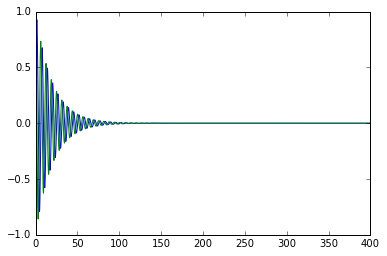

In [59]:
t = linspace(0, 400, 10000)
ini = array([0,1])

sol = odeint(osc_fric, ini, t)
plot(t, sol[:,0])
plot(t, sol[:,1])

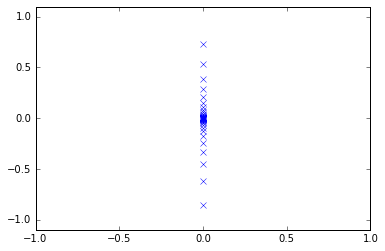

In [60]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if sol[i][0]*sol[i+1][0]<0:
        raices[j], puntos[j] = root_trayect(osc_fric, sol[i], t[i], error=1e-5)
        j += 1
raices = raices[0:j]
puntos = puntos[0:j]

xlim(-1,1)
ylim(-1.1,1.1)
plot(puntos[:,0], puntos[:,1], 'x')